
# 1. Data Generation

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import ast

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

In [2]:
# Universial data folder
# Inside, we have the CSV for each weather station, and the satellite imagery data
# shall be generated and stored inside a sub-folder
data_path = 'data_dir/'
csv_path = 'combined_dataset/'

In [3]:
# Get list of all CSV files
all_files = os.listdir(data_path + csv_path)

# Filter out the CSV files
csv_files = [file for file in all_files if file.endswith('.csv')]

# Now csv_files list contains all the names of csv files

# To get the full path of these csv files
csv_file_paths = [os.path.join(data_path, csv_path, file) for file in csv_files]

In [4]:
# Inspection purpose
len(csv_file_paths)

9

In [5]:
csv_file_paths

['data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_04839.csv',
 'data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_04846.csv',
 'data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_04877.csv',
 'data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_14815.csv',
 'data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_14819.csv',
 'data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_14845.csv',
 'data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_14848.csv',
 'data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_14850.csv',
 'data_dir/combined_dataset/Take_2_2006Fall_2017Spring_GOES_meteo_combined_94814.csv']

### `TO-DO`:

Change the index number for `csv_file_paths` to switch weather stations.

In [6]:
file_idx = 7

In [7]:
df_single_station = pd.read_csv(csv_file_paths[file_idx])

filename_curr = csv_file_paths[file_idx]
station_code = filename_curr[-9:-4] 

In [8]:
# Inspection purpose
df_single_station.head(5)

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,data_usable,cloud_count,cloud_exist,...,Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F),Unnamed: 18,precip_work_zone,is_snow_precip,is_precip,does_snow_24_120
0,2006-10-01,00:00,2006-09-30,18:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, 0.0, ...",False,0,False,...,1007.20,1007.10,0.00,NC,NC,NaN,0.00,False,False,False
1,2006-10-01,01:00,2006-09-30,19:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, 0.0, 0.0025, 0.0025, 0.0, 0.0, 0.0, 0...",False,0,False,...,1007.80,1007.50,0.00,NC,NC,NaN,0.00,False,False,False
2,2006-10-01,02:00,2006-09-30,20:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, 0.0, 0.0075, 0.0, 0.0, 0.0025, 0.0, 0.0,...",False,0,False,...,1008.30,1008.10,0.00,NC,NC,NaN,0.00,False,False,False
3,2006-10-01,03:00,2006-09-30,21:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, 0.0, 0.0025, 0.0, 0.0075, 0.0, 0.005,...",False,0,False,...,M,1008.80,0.02,NC,NC,NaN,0.02,False,True,False
4,2006-10-01,04:00,2006-09-30,22:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, 0.0, 0.0, 0.0, 0.0075, 0.0, 0.0, 0.0,...",False,0,False,...,1009.50,1009.10,0.00,NC,NC,NaN,0.00,False,False,False


In [9]:
df_single_station.shape

(48121, 31)

### Change column names for easier access.

In [10]:
# Check if 'Unnamed: 18' is in the DataFrame's columns
if 'Unnamed: 18' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['Unnamed: 18'])
#     print('Dropped the empty column.')
else:
    print('Empty column does not exist.')
    
# Check if 'does_snow_24_120' is in the DataFrame's columns
if 'does_snow_24_120' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['does_snow_24_120'])
#     print('Dropped the <does_snow_24_120> column.')
else:
    print('The <does_snow_24_120> column does not exist.')
    
# Check if 'precip_work_zone' is in the DataFrame's columns
if 'precip_work_zone' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['precip_work_zone'])
#     print('Dropped the <precip_work_zone> column.')
else:
    print('The <precip_work_zone> column does not exist.')
    
# Check if 'is_snow_precip' is in the DataFrame's columns
if 'is_snow_precip' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['is_snow_precip'])
#     print('Dropped the <is_snow_precip> column.')
else:
    print('The <is_snow_precip> column does not exist.')
    
# Check if 'is_precip' is in the DataFrame's columns
if 'is_precip' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['is_precip'])
#     print('Dropped the <is_precip> column.')
else:
    print('The <is_precip> column does not exist.')
    
# Check if 'Wind Chill (F)' is in the DataFrame's columns
if 'Wind Chill (F)' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['Wind Chill (F)'])
#     print('Dropped the <Wind Chill (F)> column.')
else:
    print('The <Wind Chill (F)> column does not exist.')
    
# Check if 'Heat Index (F)' is in the DataFrame's columns
if 'Heat Index (F)' in df_single_station.columns:
    # Drop the column
    df_single_station = df_single_station.drop(columns=['Heat Index (F)'])
#     print('Dropped the <Heat Index (F)> column.')
else:
    print('The <Heat Index (F)> column does not exist.')


In [11]:
# Renaming
df_single_station.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

In [12]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values_before = missing_values(df_single_station)
missing_values_before

,Total Null,Percentage Null
Date_UTC,0,0.000000
Time_UTC,0,0.000000
Date_CST,0,0.000000
Time_CST,0,0.000000
File_name_for_1D_lake,0,0.000000
File_name_for_2D_lake,0,0.000000
Lake_data_1D,0,0.000000
data_usable,0,0.000000
cloud_count,0,0.000000
cloud_exist,0,0.000000


In [13]:
# Replace any m, M values to nan (float type)
df_single_station['Temp_F'] = df_single_station['Temp_F'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Temp_F'] = df_single_station['Temp_F'].fillna(method='ffill').astype(float)


In [14]:
# Replace any m, M values to nan (float type)
df_single_station['RH_pct'] = df_single_station['RH_pct'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['RH_pct'] = df_single_station['RH_pct'].fillna(method='ffill').astype(float)


In [15]:
# Replace any m, M values to nan (float type)
df_single_station['Dewpt_F'] = df_single_station['Dewpt_F'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Dewpt_F'] = df_single_station['Dewpt_F'].fillna(method='ffill').astype(float)


In [16]:
# Replace any m, M values to nan (float type)
df_single_station['Wind_Spd_mph'] = df_single_station['Wind_Spd_mph'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Wind_Spd_mph'] = df_single_station['Wind_Spd_mph'].fillna(method='ffill').astype(float)


In [17]:
# Replace any m, M values to nan (float type)
df_single_station['Wind_Direction_deg'] = df_single_station['Wind_Direction_deg'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Wind_Direction_deg'] = df_single_station['Wind_Direction_deg'].fillna(method='ffill').astype(float)


> "Peak Wind Gust" refers to the highest instantaneous wind speed recorded during a specific period, typically over the course of a day. It represents the maximum force of wind experienced at a location and is usually caused by high-pressure systems or storms.

Therefore, we further replace any of the `NaN` values in the column `Peak_Wind_Gust_mph` with the value that is in the column `Wind_Spd_mph`.

In [18]:
# Replace any m, M values to nan (float type)
df_single_station['Peak_Wind_Gust_mph'] = df_single_station['Peak_Wind_Gust_mph'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Peak_Wind_Gust_mph'] = df_single_station['Peak_Wind_Gust_mph'].fillna(method='ffill').astype(float)

df_single_station['Peak_Wind_Gust_mph'] = df_single_station['Peak_Wind_Gust_mph'].fillna(df_single_station['Wind_Spd_mph'])


In [19]:
# Replace any m, M values to nan (float type)
df_single_station['Low_Cloud_Ht_ft'] = df_single_station['Low_Cloud_Ht_ft'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Low_Cloud_Ht_ft'] = df_single_station['Low_Cloud_Ht_ft'].fillna(method='ffill').astype(float)


In [20]:
# Replace any m, M values to nan (float type)
df_single_station['Med_Cloud_Ht_ft'] = df_single_station['Med_Cloud_Ht_ft'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Med_Cloud_Ht_ft'] = df_single_station['Med_Cloud_Ht_ft'].fillna(method='ffill').astype(float)

df_single_station['Med_Cloud_Ht_ft'] = df_single_station['Med_Cloud_Ht_ft'].fillna(df_single_station['Low_Cloud_Ht_ft'])

In [21]:
# Replace any m, M values to nan (float type)
df_single_station['High_Cloud_Ht_ft'] = df_single_station['High_Cloud_Ht_ft'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['High_Cloud_Ht_ft'] = df_single_station['High_Cloud_Ht_ft'].fillna(method='ffill').astype(float)

df_single_station['High_Cloud_Ht_ft'] = df_single_station['High_Cloud_Ht_ft'].fillna(df_single_station['Med_Cloud_Ht_ft'])


In [22]:
# Replace any m, M values to nan (float type)
df_single_station['Visibility_mi'] = df_single_station['Visibility_mi'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Visibility_mi'] = df_single_station['Visibility_mi'].fillna(method='ffill').astype(float)


In [23]:
# Replace any m, M values to nan (float type)
df_single_station['Atm_Press_hPa'] = df_single_station['Atm_Press_hPa'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Atm_Press_hPa'] = df_single_station['Atm_Press_hPa'].fillna(method='ffill').astype(float)


In [24]:
# Replace any m, M values to nan (float type)
df_single_station['Sea_Lev_Press_hPa'] = df_single_station['Sea_Lev_Press_hPa'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Sea_Lev_Press_hPa'] = df_single_station['Sea_Lev_Press_hPa'].fillna(method='ffill').astype(float)


In [25]:
# Replace any m, M values to nan (float type)
df_single_station['Altimeter_hPa'] = df_single_station['Altimeter_hPa'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Altimeter_hPa'] = df_single_station['Altimeter_hPa'].fillna(method='ffill').astype(float)


In [26]:
# Replace any m, M values to nan (float type)
df_single_station['Precip_in'] = df_single_station['Precip_in'].replace(['m', 'M'], float('nan'))

# Then, replace those nan values with the last numerical value in the column
df_single_station['Precip_in'].fillna(0.00, inplace = True)


After all the patch work, let's see how the situation is now with missing values.

In [27]:
missing_values_after = missing_values(df_single_station)
missing_values_after

,Total Null,Percentage Null
Date_UTC,0,0.0
Time_UTC,0,0.0
Date_CST,0,0.0
Time_CST,0,0.0
File_name_for_1D_lake,0,0.0
File_name_for_2D_lake,0,0.0
Lake_data_1D,0,0.0
data_usable,0,0.0
cloud_count,0,0.0
cloud_exist,0,0.0


In [28]:
df_daytime_only = df_single_station.loc[(df_single_station['Time_UTC'] >= '14:00')
                     & (df_single_station['Time_UTC'] <= '21:00')]
df_daytime_only  = df_daytime_only .reset_index(drop=True)
# df_daytime_only.head(10)

In [29]:
# Summary
df_daytime_only.describe()

,cloud_count,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
count,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000
mean,3189.580860,35.412594,68.103491,25.379988,8.313529,183.465087,20.610411,4533.266209,7831.145262,8623.438279,7.931796,992.852431,1016.450274,1015.765779,0.002198
std,782.601809,14.920630,15.099017,13.649343,4.870364,113.074909,3.973998,5661.230940,7455.823206,7134.171909,3.089631,8.968014,9.293042,9.136192,0.015550
min,1.000000,-13.000000,10.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,500.000000,1200.000000,0.000000,954.100000,976.800000,976.300000,0.000000
25%,3192.500000,25.000000,58.000000,16.000000,5.000000,80.000000,18.000000,1600.000000,2900.000000,3600.000000,6.000000,987.000000,1010.500000,1009.800000,0.000000
50%,3579.000000,34.000000,70.000000,25.000000,8.000000,210.000000,20.000000,2500.000000,4200.000000,5500.000000,10.000000,993.300000,1017.000000,1016.300000,0.000000
75%,3599.000000,45.000000,79.000000,34.000000,11.000000,270.000000,23.000000,4100.000000,10000.000000,11000.000000,10.000000,999.300000,1023.100000,1022.400000,0.000000
max,3599.000000,88.000000,100.000000,67.000000,32.000000,360.000000,56.000000,28000.000000,25000.000000,26000.000000,10.000000,1019.300000,1044.500000,1042.700000,0.860000


In [30]:
df_daytime_only.shape

(16040, 24)

---

# 2. Cloud Image Generation

We will try to generate the images based on the 1-D lake data.

In [31]:
df_lat_lon = pd.read_csv('data_dir/lat_long_1D_labels_for_plotting.csv')
# df_lat_lon.head(5)

In [32]:
lat_lst = df_lat_lon['latitude'].to_list()
lon_lst = df_lat_lon['longitude'].to_list()

### 1-D Lake Imagery Data Conversion

In [33]:
def rectify(crap_string):
    return [0.0 if el == 'nan' else float(el) for el in crap_string.strip('][').split(', ')]

# 3. Feature Engineering for Snowfall Events

The fundamental criteria are the temperature to be below 32 F in the local area, and the precipitation larger than 0.01 inch.

In [34]:
df_daytime_only.loc[(df_daytime_only['Temp_F'] <= 32) & (df_daytime_only['Precip_in'] > 0), 'LES_Snowfall'] = 1
df_daytime_only.loc[(df_daytime_only['Temp_F'] > 32) | (df_daytime_only['Precip_in'] <= 0), 'LES_Snowfall'] = 0
# df_daytime_only.head(5)

In [35]:
df_daytime_only = df_daytime_only.drop(['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST'], axis=1)
df_daytime_only = df_daytime_only.reset_index(drop=True)
# df_daytime_only.head()

In [36]:
df_daytime_only = df_daytime_only.drop(['data_usable', 'cloud_count', 'cloud_exist'], axis=1)
df_daytime_only = df_daytime_only.reset_index(drop=True)

In [37]:
# Summary
df_daytime_only.describe()

,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Snowfall
count,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000,16040.000000
mean,35.412594,68.103491,25.379988,8.313529,183.465087,20.610411,4533.266209,7831.145262,8623.438279,7.931796,992.852431,1016.450274,1015.765779,0.002198,0.021446
std,14.920630,15.099017,13.649343,4.870364,113.074909,3.973998,5661.230940,7455.823206,7134.171909,3.089631,8.968014,9.293042,9.136192,0.015550,0.144871
min,-13.000000,10.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,500.000000,1200.000000,0.000000,954.100000,976.800000,976.300000,0.000000,0.000000
25%,25.000000,58.000000,16.000000,5.000000,80.000000,18.000000,1600.000000,2900.000000,3600.000000,6.000000,987.000000,1010.500000,1009.800000,0.000000,0.000000
50%,34.000000,70.000000,25.000000,8.000000,210.000000,20.000000,2500.000000,4200.000000,5500.000000,10.000000,993.300000,1017.000000,1016.300000,0.000000,0.000000
75%,45.000000,79.000000,34.000000,11.000000,270.000000,23.000000,4100.000000,10000.000000,11000.000000,10.000000,999.300000,1023.100000,1022.400000,0.000000,0.000000
max,88.000000,100.000000,67.000000,32.000000,360.000000,56.000000,28000.000000,25000.000000,26000.000000,10.000000,1019.300000,1044.500000,1042.700000,0.860000,1.000000


In [38]:
df_daytime_only.LES_Snowfall.value_counts()

0.0    15696
1.0      344
Name: LES_Snowfall, dtype: int64

I reckon it looks alright? We can then work on checking the correlations between the features.

---

# 4. Correlations Between Features

Text(0.5, 1.0, 'Correlation Matrix')

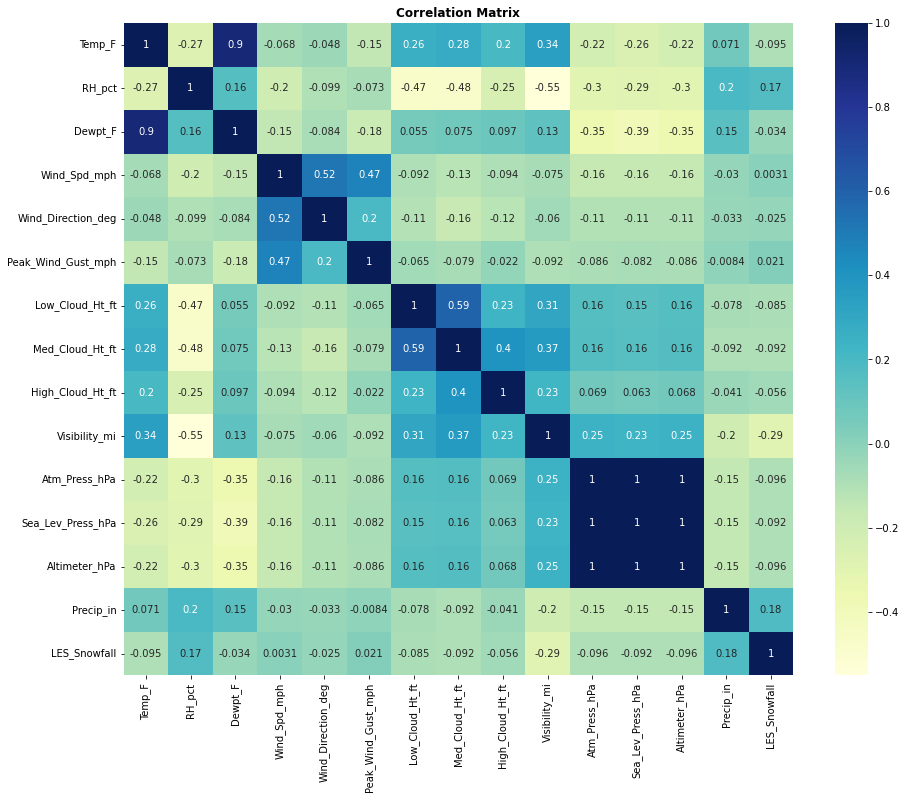

In [39]:
# Correlation 
correlation_matrix = df_daytime_only.corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

**Observations from the above correlation plots:**
- Few features are very heavily correated with each other (score >= 0.50)
    - **Temp_F** is highly correlated with **Dewpt_F**
    - **Wind_Spd_mph** is highly correlated with **Wind_Direction_deg**
    - **Atm_Press_hPa**, **Sea_Lev_Press_hPa**, and **Altimeter_hPa** are highly correlated to each other
- We also note some strong `negative correlation`, but all of them are greater than -0.5, hence we do not drop those features

We can drop the above columns since they imply to the same information, and keeping them as features will increase the model size.

But before doing this, let's work on **Atm_Press_hPa**, **Sea_Lev_Press_hPa**, and **Altimeter_hPa**, to see what is actually going on.

In [40]:
df_daytime_only = df_daytime_only.drop(['Dewpt_F', 'Sea_Lev_Press_hPa', 'Altimeter_hPa'], axis=1)
df_daytime_only = df_daytime_only.reset_index(drop=True)

# Information about dataset shape
print('Total observations: ', df_daytime_only.shape[0])
print('Total number of features: ', df_daytime_only.shape[1])
# df_daytime_only.head()

Total observations:  16040
Total number of features:  15


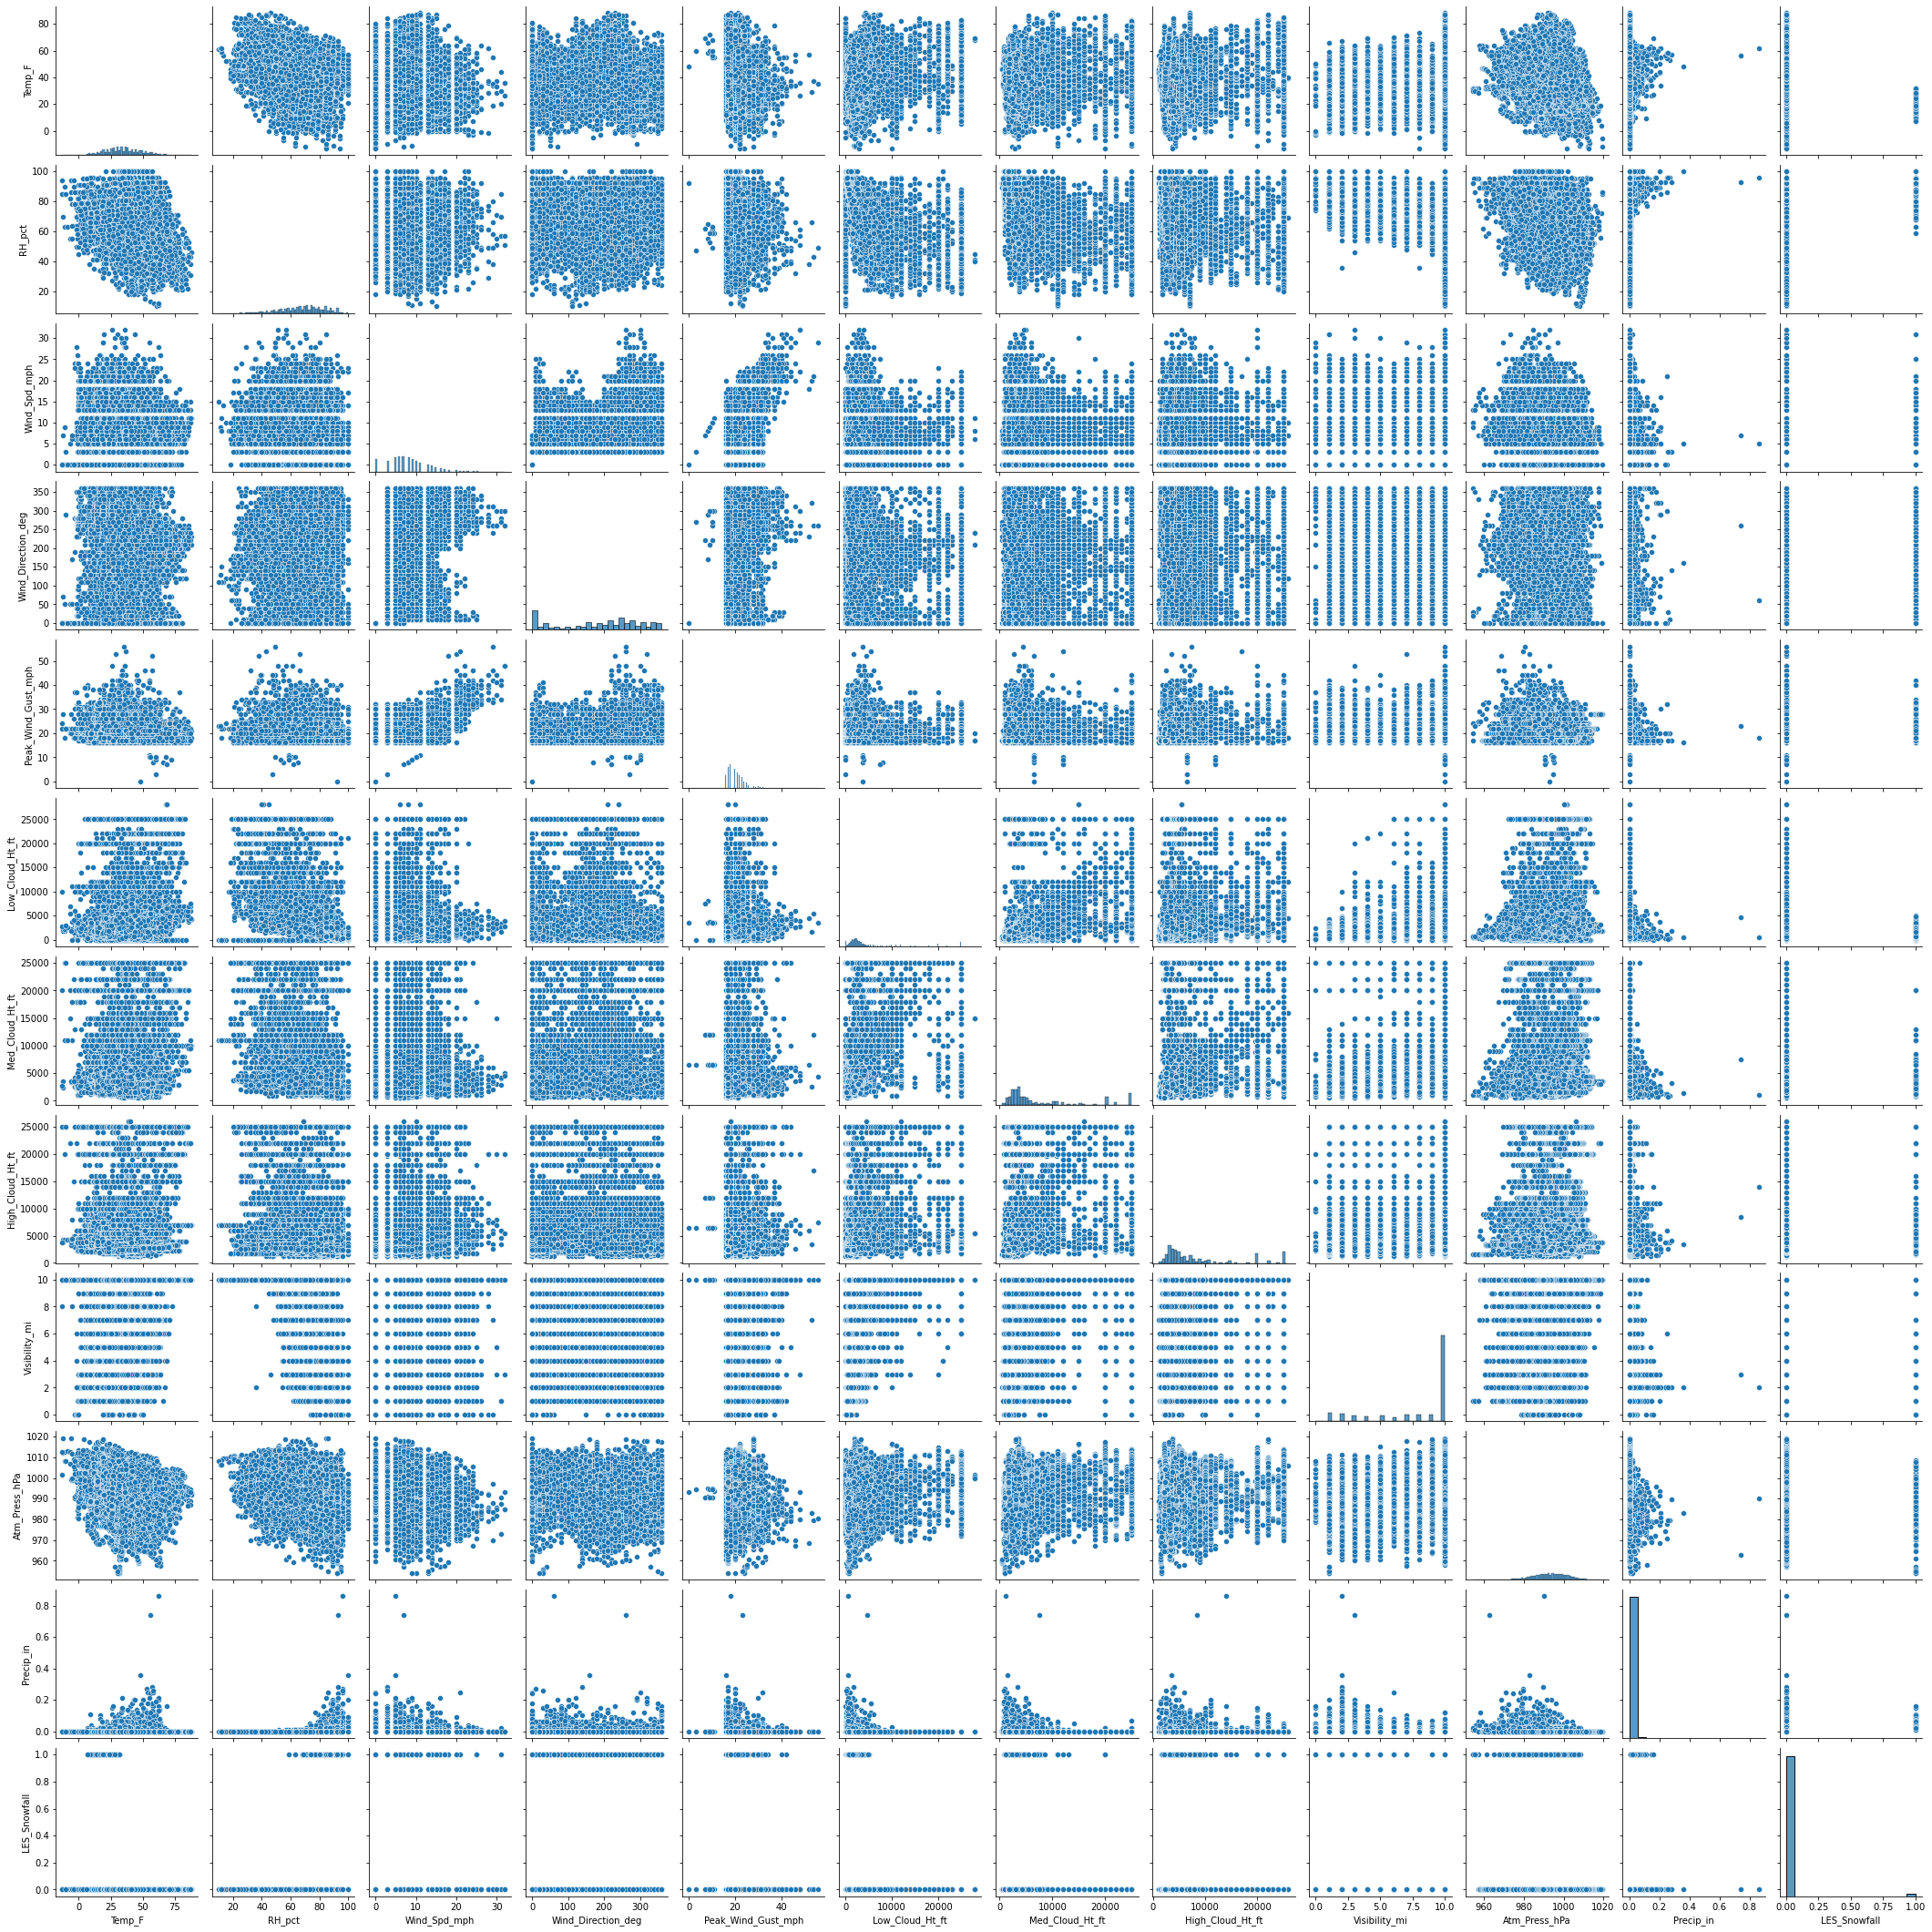

In [41]:
sns.pairplot(df_daytime_only)

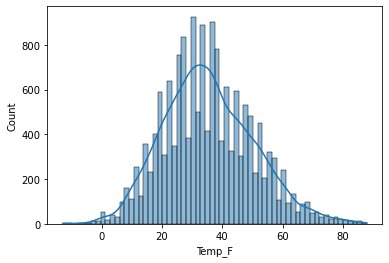

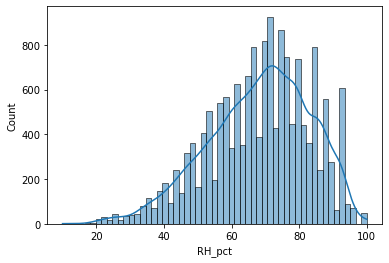

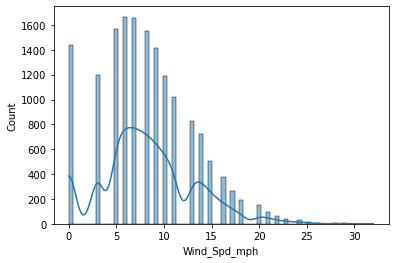

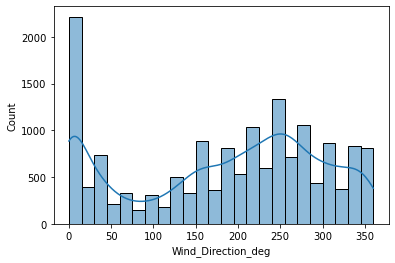

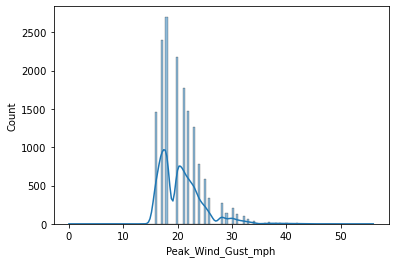

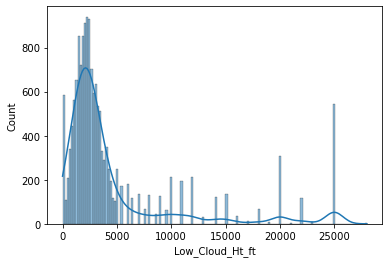

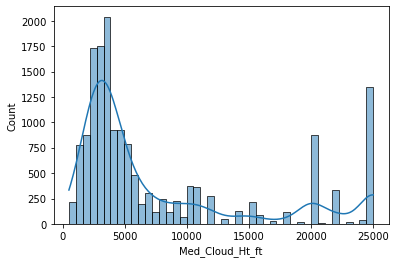

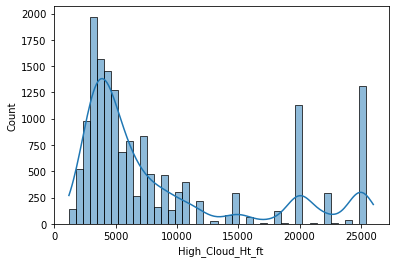

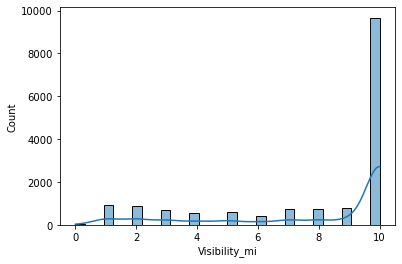

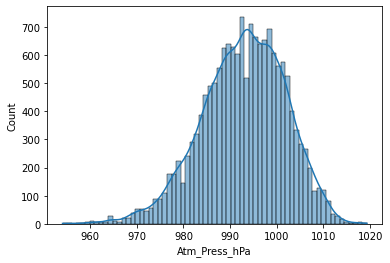

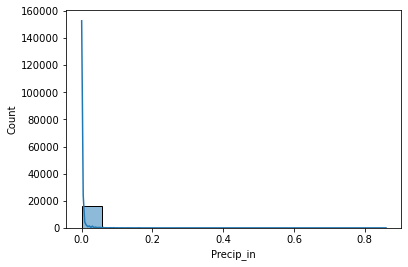

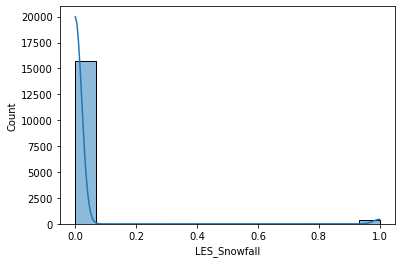

In [42]:
def distPlot(data):
    cols = data.columns[3:]
    for col in cols:
        sns.histplot(data[col], kde=True)
        plt.show()
        
distPlot(df_daytime_only)

In [43]:
df_daytime_only['LES_Snowfall'].value_counts()

0.0    15696
1.0      344
Name: LES_Snowfall, dtype: int64

<AxesSubplot:xlabel='LES_Snowfall', ylabel='count'>

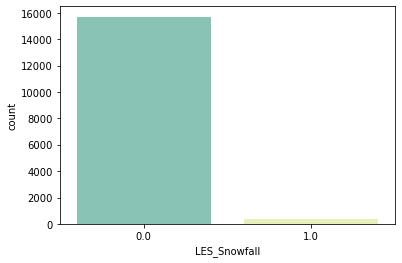

In [44]:
sns.countplot(x = df_daytime_only['LES_Snowfall'], palette=["#7fcdbb", "#edf8b1"])

---

# 5. Feature Engineering: Precipitation

### Adding a New Column For Precipitation

There is no fancy masking being applied yet. We will do that in another experiment.

In [45]:
df_daytime_only.loc[df_daytime_only['Precip_in'] > 0, 'LES_Precipitation'] = 1
df_daytime_only.loc[df_daytime_only['Precip_in'] <= 0, 'LES_Precipitation'] = 0
# df_daytime_only

<AxesSubplot:xlabel='LES_Precipitation', ylabel='count'>

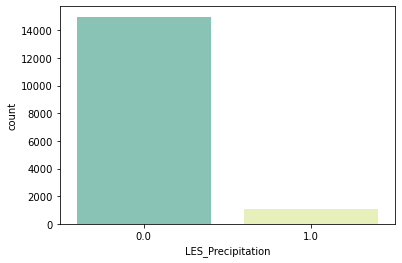

In [46]:
sns.countplot(x = df_daytime_only['LES_Precipitation'], palette=["#7fcdbb", "#edf8b1"])

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

In [48]:
from tqdm import tqdm
import cv2

images = []
for idx in tqdm(range(df_daytime_only.shape[0])):
    # im shape -> (64, 64)
    im = cv2.imread('data_dir/lake-michigan-images-64/' + str(idx) + '.png')
    # Storing 1 channel, since the images are grayscale, and cropping
    images.append(im[8:-8,8:-8,0]) 
    # images shape -> (35, 64, 64) 

100%|███████████████████████████████████████████████████████████████████████████| 16040/16040 [00:36<00:00, 434.71it/s]


# 10. Predicting rain from past imagery *and* meteo
We're going to start with one daytime's worth of cloud imagery, and one datyime plus one nighttime worth's of meteo data.

We're going to use a ConvLSTM2D for imagery, and an LSTM for meteo.

Instead of predicting cloud frames, which we know is challenging based on our past experiments, we're going to attempt to predict daily precipitation.

So now I need to go back to my original dataset, which includes nighttime meteo data:

## Data prep for cloud imagery and meteo datasets
### Meteo training and validation
We remove some highly correlated features, and redundant ones.

Specifically, we will remove 'Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake',
'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Dewpt_F', 'Peak_Wind_Gust_mph', and maybe 'Altimeter_hPa' because highly correlated with 'Atm_Press_hPa'.

Our network will consists of two networks, a ConvLSTM2D network for Cloud imagery, and an LSTM network for meteo data.

Each observation will consists of sequences: A sequence of 8 daytime hours for the imagery network, and a sequence of 24 hours for the meteo network.

First, we are going to attempt to determine if it rains at all the next day, from information from the previous day (imagery *and* meteo).

We are going to say that it rains on any day if it rains for at least one hour and more than 10% of...

If successful, we can attempt to push the boundary and predict longer into the future.

This is how we can going to create our LSTM tensor for meteo data:

In [49]:
meteo_les = df_single_station.drop(
    [ 'Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 
     'Lake_data_1D', 'Dewpt_F', 'Sea_Lev_Press_hPa', 'Altimeter_hPa', 'data_usable', 'cloud_count',
       'cloud_exist' ], axis=1)

In [50]:
meteo_les.head()

,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Precip_in
0,51.0,92.0,0.0,0.0,0.0,3700.0,3700.0,3700.0,10.0,984.4,0.00
1,48.0,96.0,0.0,0.0,0.0,3700.0,3700.0,3700.0,10.0,984.7,0.00
2,49.0,92.0,3.0,220.0,3.0,3700.0,3700.0,3700.0,10.0,985.4,0.00
3,48.0,100.0,0.0,0.0,0.0,2500.0,6500.0,6500.0,6.0,986.0,0.02
4,50.0,92.0,3.0,180.0,3.0,7000.0,6500.0,6500.0,8.0,986.4,0.00


In [51]:
len(meteo_les)

48121

In [52]:
x3 = tf.keras.preprocessing.timeseries_dataset_from_array(meteo_les, None, 24, sequence_stride=24, sampling_rate=1, 
                                                          batch_size=50000)

In [53]:
for batch in x3:
    print(batch.shape)
    print('--')

(2005, 24, 11)
--


So we have 2005 observations of 24 hours of meteo data consisting of 11 features.

But first we need to split our dataset into training and validation.

We agreed to use the first 10,000 rows of `filtered_les` as training data. Since 8 observations of that dataset correspond to 24 observations of the `meteo_les` dataset, we have 3 times more meteo observations than imagery, So we will use:

In [54]:
meteo_train_batched = tf.keras.preprocessing.timeseries_dataset_from_array(meteo_les[0:40500], None, 24, sequence_stride=24, 
                                                                   sampling_rate=1, batch_size=30000)

In [55]:
meteo_train = None
for batch in meteo_train_batched:
    meteo_train = batch
    print(meteo_train.shape)
    print('--')

(1687, 24, 11)
--


Since we started our validation dataset for imagery at index 13,050 and we had 15,959 instances of imagery, let's agree to use the last 2,500 instances of imagery as our validation dataset (skipping some intermediate `nan` instances). That corresponds to $2500 \times 3 = 7500$ rows of meteo data.

In [56]:
meteo_val_batched = tf.keras.preprocessing.timeseries_dataset_from_array(meteo_les[40500:48000], None, 24, sequence_stride=24, 
                                                                   sampling_rate=1, batch_size=7500)

In [57]:
meteo_val = None
for batch in meteo_val_batched:
    meteo_val = batch
    print(meteo_val.shape)
    print('--')

(312, 24, 11)
--


So we have about 3 times more traiing data than test data.

### Cloud imagery training and validation datasets
We can probably use `les_filtered` to gather our imagery data, just liked we did previously. But now our training dataset will consist of 8 hours of imagery and the label will be rain or not *the next day*.

Let's create our imagery training data:

In [58]:
cloud_train_batched = tf.keras.preprocessing.timeseries_dataset_from_array(images[:13500], None, 8, sequence_stride=8, 
                                                                           sampling_rate=1, batch_size=13500)

In [59]:
cloud_train = None
for batch in cloud_train_batched:
    cloud_train = batch
    cloud_train = np.expand_dims(cloud_train, axis=-1)
    print(cloud_train.shape)
    cloud_train = cloud_train / 255
    print('--')

(1687, 8, 48, 48, 1)
--


And test data:

In [60]:
cloud_val_batched = tf.keras.preprocessing.timeseries_dataset_from_array(images[13500:16000], None, 8, sequence_stride=8, 
                                                                         sampling_rate=1, batch_size=2500)

In [61]:
cloud_val = None
for batch in cloud_val_batched:
    cloud_val = batch
    cloud_val = np.expand_dims(cloud_val, axis=-1)
    print(cloud_val.shape)
    cloud_val = cloud_val / 255
    print('--')

(312, 8, 48, 48, 1)
--


### Final rain classification label
Finally, let's create our label:

This is how much precipitation in 24 hours:

In [62]:
rain_train = []
for batch in meteo_train:
    batch =batch
    batch = np.expand_dims(batch, axis=0)
    for i in range(batch.shape[0]):
        rain_train.append(sum(batch[i,:,-1]))
#                rain_train.append(sum(batch[i,:,-1].numpy()))
        
        
len(rain_train)

1687

Let's train for *serious* rain, more than 0.10 precipitation per day (is that enough?):

In [63]:
rain_train_b = [1 if 0.10 <= r else 0 for r in rain_train]

In [64]:
rain_train_c = np.array(rain_train_b)
rain_train_c.shape

(1687,)

In [65]:
rain_val = []
for batch in meteo_val:
    batch = np.expand_dims(batch, axis=0)
    for i in range(batch.shape[0]):
        rain_val.append(sum(batch[i,:,-1]))

                        
len(rain_val)

312

In [66]:
rain_val_b = [1 if 0.10 <= r else 0 for r in rain_val]

In [67]:
rain_val_c = np.array(rain_val_b)
rain_val_c.shape

(312,)

## Network
### Imagery Network

In [68]:
cloud_train.shape, rain_train_c.shape, cloud_val.shape, rain_val_c.shape

((1687, 8, 48, 48, 1), (1687,), (312, 8, 48, 48, 1), (312,))

First, let's learn how shapes get transformed through convolution. 

Assume our input consists of a 21-long sequence of 48 $\times$ 48 images. One way to process the sequences is to add the sequence dimension as a channel and use the traditional `Conv2D` api.

[Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)(`filters`, `kernel_size`, `strides=(1, 1)`, ...)

Note that the shape-shifting operators are `filters` and `strides`.

In [69]:
from keras.layers import Dropout, GlobalAveragePooling2D, MaxPooling2D

input_cnn = layers.Input(shape=(48,48,21))
print("layers.Input(shape=(48,48,21))", input_cnn.shape)
x = layers.Conv2D(3, (3, 3), (2,2), padding='same', activation='selu')(input_cnn)
print("layers.Conv2D(3, (3, 3), (2,2)", x.shape)
x = MaxPooling2D(pool_size=(2,2))(x)
print("MaxPooling2D(pool_size=(2,2))", x.shape)
x = layers.Conv2D(6, (3, 3), (2,2), padding='same', activation='selu')(x)
print("layers.Conv2D(6, (3, 3), (2,2)", x.shape)
x = MaxPooling2D(pool_size=(2,2))(x)
print("MaxPooling2D(pool_size=(2,2)", x.shape)
x = GlobalAveragePooling2D()(x)
print("GlobalAveragePooling2D", x.shape)
x.shape

layers.Input(shape=(48,48,21)) (None, 48, 48, 21)
layers.Conv2D(3, (3, 3), (2,2) (None, 24, 24, 3)
MaxPooling2D(pool_size=(2,2)) (None, 12, 12, 3)
layers.Conv2D(6, (3, 3), (2,2) (None, 6, 6, 6)
MaxPooling2D(pool_size=(2,2) (None, 3, 3, 6)
GlobalAveragePooling2D (None, 6)


TensorShape([None, 6])

Instead, if we want to use the more orthodox [ConvLSTM2D](https://keras.io/api/layers/recurrent_layers/conv_lstm2d/)(`filters`, `kernel_size`, `strides=(1, 1)`, ...) on 8-long sequences of images (with one gray channel):

We can stack 3 `ConvLSTM2D` layers with batch normalization, followed by a `Conv3D` layer for the spatiotemporal outputs.

[Conv3D](https://keras.io/api/layers/convolution_layers/convolution3d/) api is: `layers.Conv3D( filters, kernel_size, strides=(1, 1, 1), ...`.

Here are some examples:

In [70]:
# The inputs are 28x28x28 volumes with a single channel, and the batch size is 4
input_shape =(4, 28, 28, 28, 1)
x = tf.random.normal(input_shape)
print(x.shape)
y = tf.keras.layers.Conv3D(2, 3, activation='relu', padding="same", input_shape=input_shape[1:])(x)
print(y.shape)

(4, 28, 28, 28, 1)
(4, 28, 28, 28, 2)


In [71]:
# With extended batch shape [4, 7], e.g. a batch of 4 videos of 3D frames, with 7 frames per video.
input_shape = (4, 7, 28, 28, 28, 1)
x = tf.random.normal(input_shape)
print(x.shape)
y = tf.keras.layers.Conv3D(2, 3, activation='relu', padding="same", input_shape=input_shape[2:])(x)
print(y.shape)

(4, 7, 28, 28, 28, 1)
(4, 7, 28, 28, 28, 2)


Ok, here's our stack of 3 `ConvLSTM2D` layers with batch normalization, followed by a `Conv3D` layer for the spatiotemporal outputs.

Since the padding is `same` and `stride` defaults to `(1,1)`, our images remain the same size through the stack.

In [72]:
print(*cloud_train.shape[2:])

48 48 1


In [73]:
# Construct the input layer with no definite frame size (None below could be replaced by 8)
inp = layers.Input(shape=(None, *cloud_train.shape[2:]))
print("layers.Input(shape=", inp.shape)

x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
print("ConvLSTM2D filters=64, kernel_size=(5, 5)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D filters=64, kernel_size=(3, 3)", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D filters=64, kernel_size=(1, 1)", x.shape)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)
print("Conv3D kernel_size=(3, 3, 3)", x.shape)

layers.Input(shape= (None, None, 48, 48, 1)
ConvLSTM2D filters=64, kernel_size=(5, 5) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D filters=64, kernel_size=(3, 3) (None, None, 48, 48, 64)
BatchNormalization (None, None, 48, 48, 64)
ConvLSTM2D filters=64, kernel_size=(1, 1) (None, None, 48, 48, 64)
Conv3D kernel_size=(3, 3, 3) (None, None, 48, 48, 1)


So this network is appropriate when the input is `z` number of observations, each one a sequence of `t` grayscale images of size $48 \times 48$, i.e. `(None=z, None=t, 48, 48, 1)`, *and the label is a sequence of exactly the same size*: `(None=z, None=t, 48, 48, 1)`.

If we want to predict rain or not, which is just a binary label, then we need a network that reduces from `(None=z, None=t, 48, 48, 1)` to `{None, q)`, where q will be the vector to be concatenated with the final meteo vector and then passed through a Dense layer for the final binary rain yes/no! 

So it makes sense to *slowly* reduce the size of the image, *and* also to flatten the size of the sequence. We can slowly reduce the size of our images with strides larger than `(1,1)` in our convolutions, and we can flatten our sequence to a single dimension with `return_sequences=False` in our last convolution layer. For example, this way:

In [74]:
# Construct the input layer with no definite frame size (None below could be replaced by 8)
inp = layers.Input(shape=(None, *cloud_train.shape[2:]))
print("layers.Input(shape=", inp.shape)

# x = layers.ConvLSTM2D(
#     filters=64,
#     kernel_size=(5, 5),
#     strides=(2, 2),
#     padding="same",
#     return_sequences=True,
#     activation="relu",
# )(inp)
x = layers.ConvLSTM2D(
    filters=128,
    kernel_size=(5, 5),
    strides=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
print("ConvLSTM2D filters=64, kernel_size=(5, 5), return_sequences=True", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    strides=(2, 2),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.ConvLSTM2D(
    filters=32,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D filters=64, kernel_size=(3, 3), return_sequences=True", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)
x = layers.ConvLSTM2D(
    filters=32,
    kernel_size=(1, 1),
    strides=(2, 2),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
print("ConvLSTM2D filters=64, kernel_size=(1, 1), return_sequences=True", x.shape)
x = layers.Conv3D(
    filters=8, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Note that MaxPooling2D takes in a 4D input and downsamples the input along its spatial dimensions (height and width) by 
# taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window 
# is shifted by strides along each dimension. The first dim is observattions, the next 2 dims are height and width, and 
# the last dim is channels. So it downsamples only the two intermediate dimensions (height and width). If i do the follwing:
# x = MaxPooling2D(pool_size=(2,2))(x[:, :, :, :, 0])
# .. it will work but it will assume that the number of channels is 6 and leave them untouched. That is not what I want! I 
# want to downsample the sequence dimension!

# Better to use an additional convolution layer with return_sequences=False
print("Conv3D kernel_size=(3, 3, 3)", x.shape)
x = layers.ConvLSTM2D(
    filters=8,
    kernel_size=(1, 1),
    strides=(2, 2),
    padding="same",
    return_sequences=False,
    activation="relu",
)(x)
print("ConvLSTM2D filters=1, kernel_size=(1, 1), return_sequences=False", x.shape)
x = layers.BatchNormalization()(x)
print("BatchNormalization", x.shape)

#x = layers.Dense(1)(x)
#print("Dense", x.shape)
x = GlobalAveragePooling2D()(x)
print("GlobalAveragePooling2D", x.shape)

layers.Input(shape= (None, None, 48, 48, 1)
ConvLSTM2D filters=64, kernel_size=(5, 5), return_sequences=True (None, None, 48, 48, 128)
BatchNormalization (None, None, 48, 48, 128)
ConvLSTM2D filters=64, kernel_size=(3, 3), return_sequences=True (None, None, 12, 12, 32)
BatchNormalization (None, None, 12, 12, 32)
ConvLSTM2D filters=64, kernel_size=(1, 1), return_sequences=True (None, None, 6, 6, 32)
Conv3D kernel_size=(3, 3, 3) (None, None, 6, 6, 8)
ConvLSTM2D filters=1, kernel_size=(1, 1), return_sequences=False (None, 3, 3, 8)
BatchNormalization (None, 3, 3, 8)
GlobalAveragePooling2D (None, 8)


### Meteo network

In [75]:
meteo_train.shape, rain_train_c.shape, meteo_val.shape, rain_val_c.shape

(TensorShape([1687, 24, 11]), (1687,), TensorShape([312, 24, 11]), (312,))

In [76]:
meteo_train.shape[1:]

TensorShape([24, 11])

In [77]:
RNN = layers.LSTM
hidden_size = 8
data_shape = (24, 11)
data = layers.Input(shape= data_shape)
meteo_inp = layers.Input(shape=(None, *meteo_train.shape[1:]))
print("layers.Input(shape=", meteo_inp.shape)
lstm1 = RNN(hidden_size, input_shape=(24, data_shape[1]), return_sequences= True)(data)
lstm2 = RNN(hidden_size, input_shape=(24, hidden_size), return_sequences= True)(lstm1)
lstm3 = RNN(hidden_size, input_shape=(24, hidden_size), return_sequences= True)(lstm2)
lstm4 = RNN(hidden_size, input_shape=(24, hidden_size), return_sequences= False)(lstm3)
lstm4.shape
# lstm2 = RNN(hidden_size, input_shape=(24, hidden_size), return_sequences= False)(lstm1)
# lstm2.shape


layers.Input(shape= (None, None, 24, 11)


TensorShape([None, 8])

### Imagery + meteo
Our final classification into rain or no rain, based on a balanced amount of information from both imagery and meteo:

In [79]:
# Flatten the output of CNN
#flattened = layers.Flatten()(conv6)

# Connect the CNN output and RNN output to a dense layer with 1 neuron for final 0/1 outputs
final = layers.Concatenate(axis=1)([lstm4, x])
print("layers.Concatenate(axis=1)([lstm2, x])", final.shape)
out = layers.Dense(1, activation='sigmoid')(final)
print("layers.Dense(1)", out.shape)

layers.Concatenate(axis=1)([lstm2, x]) (None, 16)
layers.Dense(1) (None, 1)


In [80]:
# Using both, images and numerical data as input
#inp = layers.Input(shape=(None, *cloud_train.shape[2:]))
#data = layers.Input(shape= (24, 11))
model = keras.models.Model([inp, data], out)  
#model = keras.models.Model(inp, x)

# Build model
model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, 48, 4  0           []                               
                                8, 1)]                                                            
                                                                                                  
 conv_lstm2d_3 (ConvLSTM2D)     (None, None, 48, 48  1651712     ['input_3[0][0]']                
                                , 128)                                                            
                                                                                                  
 batch_normalization_2 (BatchNo  (None, None, 48, 48  512        ['conv_lstm2d_3[0][0]']          
 rmalization)                   , 128)                                                        

## Training

In [ ]:
# Define some callbacks to improve training
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=15)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=10)

# Define modifiable training hyperparameters
epochs = 100
batch_size = 16

from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Started training at", current_time)

# Fit the model to the training data
history = model.fit(
    [cloud_train, meteo_train],
    rain_train_c,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=([cloud_val, meteo_val], rain_val_c),
    callbacks=[early_stopping, reduce_lr],
)

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Finished training at", current_time)

Started training at 06:58:34
Epoch 1/100
106/106 [==============================] - 55s 399ms/step - loss: 0.4534 - accuracy: 0.8601 - val_loss: 0.4392 - val_accuracy: 0.8429 - lr: 0.0010
Epoch 2/100
106/106 [==============================] - 67s 638ms/step - loss: 0.3768 - accuracy: 0.8696 - val_loss: 0.4381 - val_accuracy: 0.8429 - lr: 0.0010
Epoch 3/100
106/106 [==============================] - 270s 3s/step - loss: 0.3684 - accuracy: 0.8696 - val_loss: 0.4347 - val_accuracy: 0.8429 - lr: 0.0010
Epoch 4/100
106/106 [==============================] - 259s 2s/step - loss: 0.3802 - accuracy: 0.8696 - val_loss: 0.4444 - val_accuracy: 0.8429 - lr: 0.0010
Epoch 5/100
 58/106 [===============>..............] - ETA: 2:44 - loss: 0.3932 - accuracy: 0.8621

That looks pretty good :-) It looks like I can keep on training, too! The first couple epoch took too long since I was running out of memory (forgot to close other notebooks), so the memory overflew into the RAM off from the GPU.

Let's look at accuracy:

In [ ]:
cloud_val.shape, tf.convert_to_tensor(cloud_val).shape, meteo_val.shape

In [ ]:
# Select a random example from the cloud imagery validation dataset
example_index = np.random.choice(range(len(cloud_val)), size=1)[0]
print("Picked index", example_index,"from validation dataset.")
example_clouds = tf.convert_to_tensor(cloud_val[example_index]) # all 8 frames from the example

# Select the same example from the meteo validation dataset
example_meteo = meteo_val[example_index]

# input
#np.expand_dims([example_clouds, example_meteo], axis=0)
[example_clouds, example_meteo]

In [ ]:
pred_input_combo = np.expand_dims([example_clouds, example_meteo], axis = 0)

# `TO-DO`: See if can fix it later down the line.

In [ ]:
# pred_input_combo = np.array(pred_input_combo, dtype=object)

In [ ]:
# tf.convert_to_tensor(pred_input_combo, dtype=tf.float32)

In [ ]:
# model.predict(pred_input_combo)

In [ ]:
pred = model([cloud_val, meteo_val])

# Convert to array
pred = np.array(pred)

# Assigning class based on prediction
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0
#pred[pred != 1] = 0

# Class-wise accuracy
classwise1 = ((np.array(pred)[:,0] == np.array(rain_val_c))*(rain_val_c==1)).sum()/(rain_val_c==1).sum()
classwise0 = ((np.array(pred)[:,0] == np.array(rain_val_c))*(rain_val_c==0)).sum()/(rain_val_c==0).sum()

In [ ]:
print(f'Total Accuracy: \t {((np.array(pred)[:,0] == np.array(rain_val_c)).sum()/len(pred))*100:.3f}')
print('-'*30)
print('--Class wise Accuracy of Test--')
print('-'*30)
print(f'Class 0: \t {classwise0*100:.3f}')
print(f'Class 1: \t {classwise1*100:.3f}')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['val_loss'], label='Validation')
plt.plot(history.history['loss'], label='Train')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Loss for Imagery + Meteo network for rain prediction')
plt.savefig('data_dir/Losses-imagery-and-meteo-rain-prediction-24-'+station_code+'.png')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(history.history['accuracy'], label='Train')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy for Imagery + Meteo network for rain prediction')
plt.savefig('data_dir/Accuracy-imagery-and-meteo-rain-prediction-24-'+station_code+'.png')

In [ ]:
rain_val_c

In [ ]:
import matplotlib.pyplot as plt

# Assuming rain_val_c is your array
plt.hist(rain_val_c, bins=30)  # Change bins to get a different granularity
plt.title('Distribution of Values in rain_val_c')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


In [ ]:
rain_val_series = pd.Series(rain_val_c)
value_counts = rain_val_series.value_counts()
value_counts

In [ ]:
rain_train_c

In [ ]:
rain_train_series = pd.Series(rain_train_c)
value_counts = rain_train_series.value_counts()
value_counts

###### 